In [75]:
import pandas as pd
import math
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1

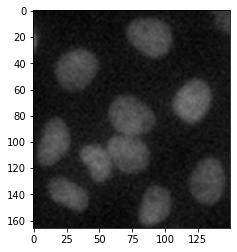

In [2]:
img = cv.imread("touching_grayscale.png")
plt.imshow(img)
plt.show()

### K Means Clustering

In [3]:
vectorized = img.reshape((-1,3))   
vectorized = np.float32(vectorized)
vectorized

array([[17., 17., 17.],
       [24., 24., 24.],
       [16., 16., 16.],
       ...,
       [10., 10., 10.],
       [10., 10., 10.],
       [11., 11., 11.]], dtype=float32)

In [4]:
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10
ret,label,center=cv.kmeans(vectorized,K,None,criteria,attempts,cv.KMEANS_PP_CENTERS)

In [5]:
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

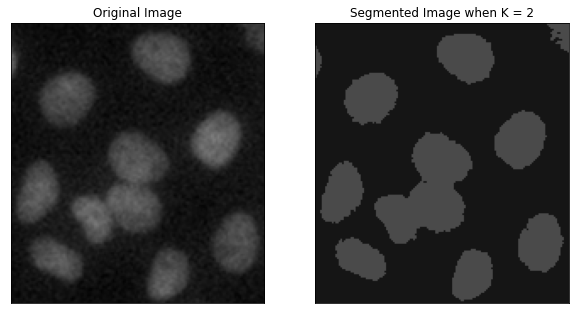

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()

### Otsu Thresolding

In [7]:
gimg = cv.GaussianBlur(img,(5,5),0)

In [8]:
from skimage.filters import threshold_otsu

c:\Users\aayus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [9]:
threshold_otsu(gimg)


C:\Users\aayus\AppData\Local\Temp\ipykernel_28220\2977482318.py:1: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (166, 150, 3) looks like that of an RGB image.
  threshold_otsu(gimg)


47

In [10]:
ret ,thresh1 = cv.threshold(gimg, 47,255, cv.THRESH_BINARY)
ret

47.0

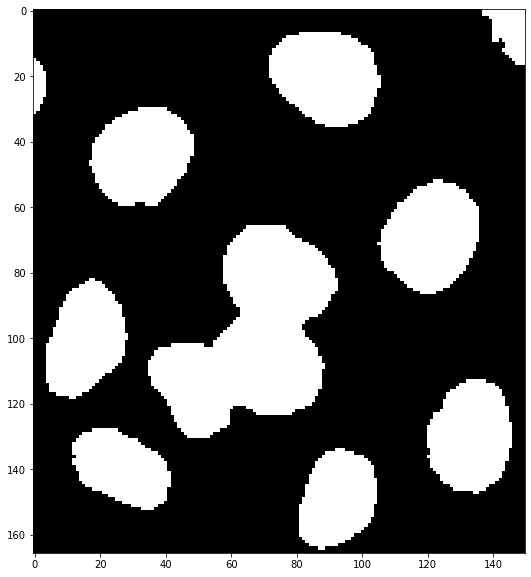

In [11]:
plt.figure(figsize = (10,10))
plt.imshow(thresh1)
plt.show()

In [12]:
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray.shape


(166, 150)

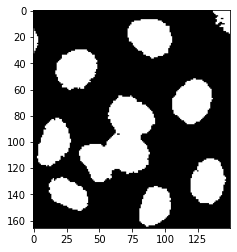

In [13]:
num_labels, labels_im = cv.connectedComponents(gray)
ret2, th2  = cv.threshold(gray, 47, 255, cv.THRESH_BINARY)  
plt.imshow(th2, cmap='gray')
plt.show()


In [14]:
from skimage.measure import label
from skimage.measure import regionprops

In [15]:
label_img = label(th2)
regions = regionprops(label_img)

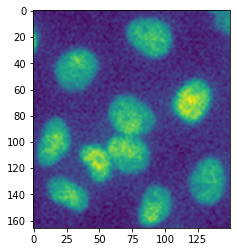

In [16]:
plt.imshow(gray)

In [17]:
from skimage.measure import regionprops_table

props = regionprops_table(label_img, properties=('centroid',
                                                 'orientation',
                                                 'axis_major_length',
                                                 'axis_minor_length',
                                                 'area',
                                                 'bbox'))

In [18]:
pd.DataFrame(props)

,centroid-0,centroid-1,orientation,axis_major_length,axis_minor_length,area,bbox-0,bbox-1,bbox-2,bbox-3
0,6.500000,144.609589,0.400002,19.644521,11.628229,146,0,137,18,150
1,20.147520,88.934726,1.125731,35.121504,28.013534,766,7,72,37,106
2,22.960784,1.078431,-0.004131,17.569469,4.103385,51,14,0,33,4
3,44.479675,32.613821,-0.886395,33.358050,28.302318,738,30,17,61,49
4,69.080311,120.993523,-0.480578,34.860608,28.336833,772,52,106,87,137
5,99.510185,66.618664,-0.538040,73.842484,44.063285,2111,65,35,131,93
6,100.538344,15.383436,-0.333068,37.445768,22.579171,652,82,3,119,29
7,130.120226,132.848656,-0.182807,35.072039,25.829753,707,113,120,148,147
8,139.591603,26.553435,1.046103,33.678134,19.994281,524,127,12,153,42
9,148.984099,92.372792,-0.398654,31.838016,22.853042,566,134,81,165,105


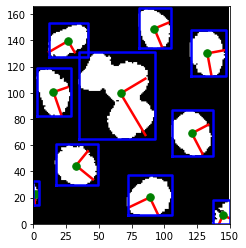

In [19]:
fig, ax = plt.subplots()
ax.imshow(th2, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.axis_minor_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.axis_minor_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.axis((0, 150, 0,166))
plt.show()

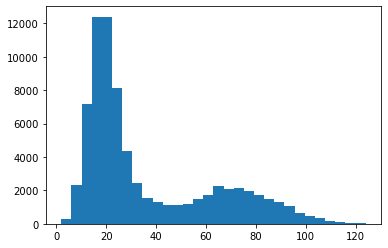

In [20]:
plt.hist(img.ravel(),bins = 30)
plt.show()

## Exercise 2

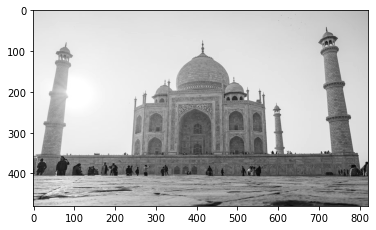

In [21]:
taj1 = cv.imread('taj1.jpg')
gray1 = cv.cvtColor(taj1,cv.COLOR_BGR2GRAY)
plt.imshow(gray1, cmap='gray')
plt.show()

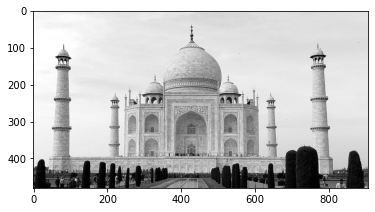

In [22]:
taj2 = cv.imread('taj2.jpg')
gray2 = cv.cvtColor(taj2,cv.COLOR_BGR2GRAY)
plt.imshow(gray2, cmap = 'gray')
plt.show()

In [23]:
gray2.shape

(480, 907)

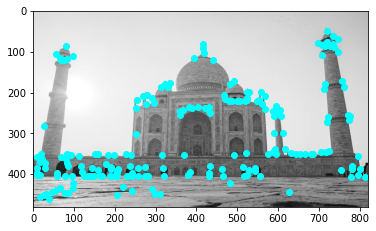

In [24]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks

coords = corner_peaks(corner_harris(gray1), min_distance=5, threshold_rel=0.02)
coords_subpix = corner_subpix(gray1, coords, window_size=13)

fig, ax = plt.subplots()
ax.imshow(gray1, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
#ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.axis((0, 821, 480, 0))
plt.show()

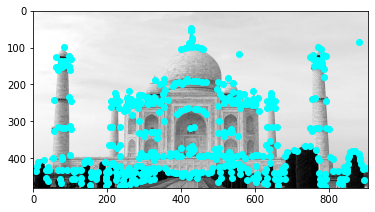

In [25]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks



coords = corner_peaks(corner_harris(gray2), min_distance=5, threshold_rel=0.02)
coords_subpix = corner_subpix(gray2, coords, window_size=13)



fig, ax = plt.subplots()
ax.imshow(gray2, cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], color='cyan', marker='o',
        linestyle='None', markersize=6)
#|ax.plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=15)
ax.axis((0, 907, 480, 0))
plt.show()

In [26]:
surf = cv.FastFeatureDetector_create()
keypoints1 = surf.detect(gray1, None)
keypoints2 = surf.detect(gray2, None)

descriptor = cv.SIFT_create()



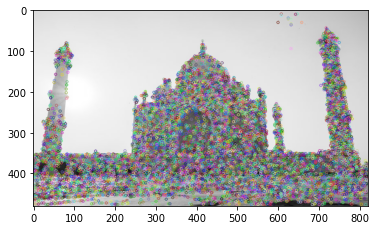

In [27]:
img=cv.drawKeypoints(gray1,keypoints1,img)
plt.imshow(img)
plt.show()

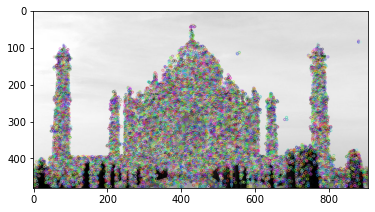

In [28]:
img=cv.drawKeypoints(gray2,keypoints2,img)
plt.imshow(img)
plt.show()

## Exercise 4

In [314]:
word = ['The','Car','Truck','Is','Driven','On','Road','Highway']
A = [2,1,0,1,1,1,1,0]
B = [2,0,1,1,1,1,0,1]

df = pd.DataFrame([A,B], columns=word, index = ['A',"B"])
df

,The,Car,Truck,Is,Driven,On,Road,Highway
A,2,1,0,1,1,1,1,0
B,2,0,1,1,1,1,0,1


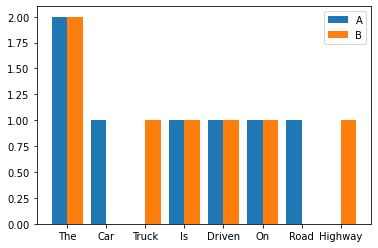

In [315]:
X_axis = np.arange(len(word))
plt.bar(X_axis-0.2, A,0.4, label='A')
plt.bar(X_axis+0.2, B,0.4, label='B')
plt.xticks(X_axis, word)
plt.legend()
plt.show()

In [319]:
word[3], 1 if bool(A[3]) else 0,1 if bool(B[3]) else 0,np.sum([1 if bool(A[3]) else 0,1 if bool(B[3]) else 0]),np.log(2/2)

('Is', 1, 1, 2, 0.0)

In [325]:
n_d = np.sum(A)
N = 2 #No. of sentences
i = 0
A_tf = []
A_idf =[]
A_tid = []
for n_id in A:
    tf = n_id/n_d
    A_tf.append(tf)
    n_i = np.sum([1 if bool(A[i]) else 0,1 if bool(B[i]) else 0])
    idf = np.log(N/n_i)
    A_idf.append(idf)
    A_tid.append(tf*idf)
    i += 1

In [326]:
n_d = np.sum(B)
N = 2 #No. of sentences
i = 0
B_tf = []
B_idf =[]
B_tid = []
for n_id in B:
    tf = n_id/n_d
    B_tf.append(tf)
    n_i = np.sum([1 if bool(A[i]) else 0,1 if bool(B[i]) else 0])
    idf = np.log(N/n_i)
    B_idf.append(idf)
    B_tid.append(tf*idf)
    i += 1

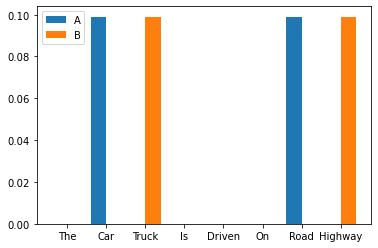

In [327]:
X_axis = np.arange(len(word))
plt.bar(X_axis-0.2, A_tid,0.4, label='A')
plt.bar(X_axis+0.2, B_tid,0.4, label='B')
plt.xticks(X_axis, word)
plt.legend()
plt.show()

## Exercise 3

### Pre-trained algorithm  for detecting face

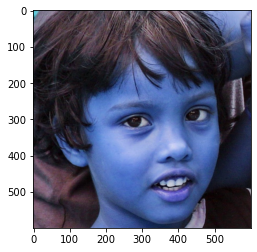

In [59]:
img = cv.imread('real_00001.jpg')
plt.imshow(img, cmap = 'gray')
plt.show()

In [60]:
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#haar_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')
face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')
faces_rect = face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=9)

eyes = eye_cascade.detectMultiScale(gray_img)

for (x, y, w, h) in faces_rect:
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), thickness=2)

#for (ex,ey,ew,eh) in eyes:
#    cv.rectangle(img,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

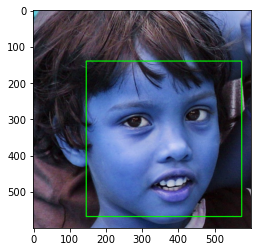

In [61]:
plt.imshow(img)
plt.show()

In [37]:
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

In [38]:
def get_pixel(img, center, x, y):
    new_value = 0
    try:
        if img[x][y] >= center:
            new_value = 1
    except:
        pass
    return new_value

In [39]:
def lbp_calculated_pixel(img, x, y):
    '''
     64 | 128 |   1
    ----------------
     32 |   0 |   2
    ----------------
     16 |   8 |   4    
    '''    
    center = img[x][y]
    val_ar = []
    val_ar.append(get_pixel(img, center, x-1, y+1))     # top_right
    val_ar.append(get_pixel(img, center, x, y+1))       # right
    val_ar.append(get_pixel(img, center, x+1, y+1))     # bottom_right
    val_ar.append(get_pixel(img, center, x+1, y))       # bottom
    val_ar.append(get_pixel(img, center, x+1, y-1))     # bottom_left
    val_ar.append(get_pixel(img, center, x, y-1))       # left
    val_ar.append(get_pixel(img, center, x-1, y-1))     # top_left
    val_ar.append(get_pixel(img, center, x-1, y))       # top
    
    power_val = [1, 2, 4, 8, 16, 32, 64, 128]
    val = 0
    for i in range(len(val_ar)):
        val += val_ar[i] * power_val[i]
    return val    

In [40]:
def show_output(output_list):
    output_list_len = len(output_list)
    figure = plt.figure(figsize=(20,7))
    for i in range(output_list_len):
        current_dict = output_list[i]
        current_img = current_dict["img"]
        current_xlabel = current_dict["xlabel"]
        current_ylabel = current_dict["ylabel"]
        current_xtick = current_dict["xtick"]
        current_ytick = current_dict["ytick"]
        current_title = current_dict["title"]
        current_type = current_dict["type"]
        current_plot = figure.add_subplot(1, output_list_len, i+1)
        if current_type == "gray":
            current_plot.imshow(current_img, cmap = plt.get_cmap('gray'))
            current_plot.set_title(current_title)
            current_plot.set_xticks(current_xtick)
            current_plot.set_yticks(current_ytick)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)
        elif current_type == "histogram":
            current_plot.plot(current_img, color = "black")
            current_plot.set_xlim([0,260])
            current_plot.set_title(current_title)
            current_plot.set_xlabel(current_xlabel)
            current_plot.set_ylabel(current_ylabel)            
            ytick_list = [int(i) for i in current_plot.get_yticks()]
            current_plot.set_yticklabels(ytick_list,rotation = 90)

    plt.show()

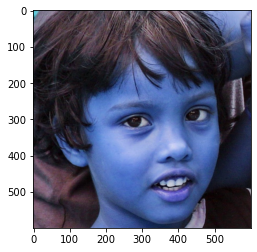

In [41]:
def main():
    image_file = 'real_00001.jpg'
    img_bgr = cv.imread(image_file)
    height, width, channel = img_bgr.shape
    img_gray = cv.cvtColor(img_bgr, cv.COLOR_BGR2GRAY)
    
    img_lbp = np.zeros((height, width,3), np.uint8)
    for i in range(0, height):
        for j in range(0, width):
             img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)
    hist_lbp = cv.calcHist([img_lbp], [0], None, [256], [0, 256])
    
    output_list = []
    
    output_list.append({
        "img": img_gray,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "Gray Image",
        "type": "gray"        
    })
    output_list.append({
        "img": img_lbp,
        "xlabel": "",
        "ylabel": "",
        "xtick": [],
        "ytick": [],
        "title": "LBP Image",
        "type": "gray"
    })    
    output_list.append({
        "img": hist_lbp,
        "xlabel": "Bins",
        "ylabel": "Number of pixels",
        "xtick": None,
        "ytick": None,
        "title": "Histogram(LBP)",
        "type": "histogram"
    })

    show_output(output_list)
                             
    cv.waitKey(0)
    cv.destroyAllWindows()
    print("LBP Program is finished")

image_file = 'real_00001.jpg'
img_bgr = cv.imread(image_file)
plt.imshow(img_bgr)
plt.show()


C:\Users\aayus\AppData\Local\Temp\ipykernel_28220\3780397659.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  current_plot.set_yticklabels(ytick_list,rotation = 90)


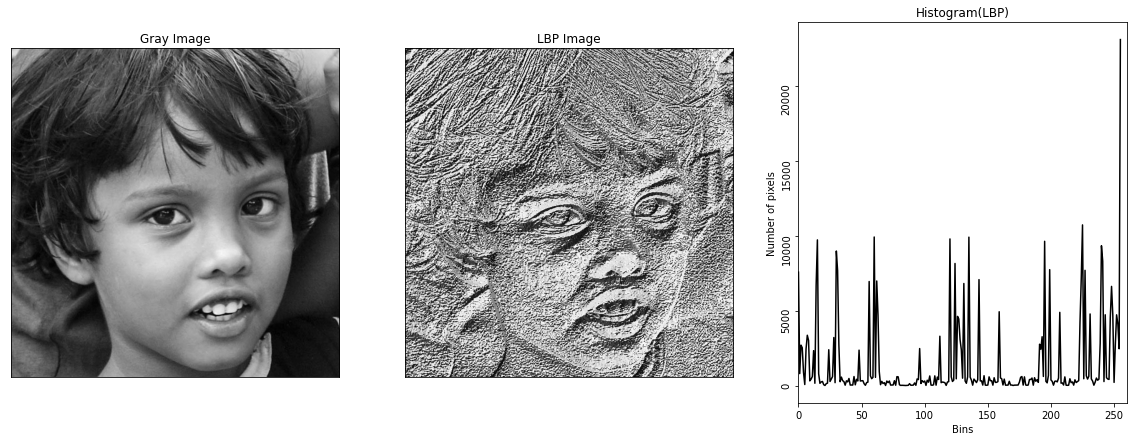

LBP Program is finished


In [42]:
main()

In [51]:
cap = cv.VideoCapture("videoplayback.mp4")

In [52]:
ret, first_frame = cap.read()

In [53]:
prev_gray = cv.cvtColor(first_frame, cv.COLOR_BGR2GRAY)
mask = np.zeros_like(first_frame)

In [54]:
mask[..., 1] = 255

In [47]:
while(cap.isOpened()):
      
    # ret = a boolean return value from getting
    # the frame, frame = the current frame being
    # projected in the video
    ret, frame = cap.read()
      
    # Opens a new window and displays the input
    # frame
    cv.imshow("input", frame)
      
    # Converts each frame to grayscale - we previously 
    # only converted the first frame to grayscale
    gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
      
    # Calculates dense optical flow by Farneback method
    flow = cv.calcOpticalFlowFarneback(prev_gray, gray, 
                                       None,
                                       0.5, 3, 15, 3, 5, 1.2, 0)
      
    # Computes the magnitude and angle of the 2D vectors
    magnitude, angle = cv.cartToPolar(flow[..., 0], flow[..., 1])
      
    # Sets image hue according to the optical flow 
    # direction
    mask[..., 0] = angle * 180 / np.pi / 2
      
    # Sets image value according to the optical flow
    # magnitude (normalized)
    mask[..., 2] = cv.normalize(magnitude, None, 0, 255, cv.NORM_MINMAX)
      
    # Converts HSV to RGB (BGR) color representation
    rgb = cv.cvtColor(mask, cv.COLOR_HSV2BGR)
      
    # Opens a new window and displays the output frame
    cv.imshow("dense optical flow", rgb)
      
    # Updates previous frame
    prev_gray = gray
      
    # Frames are read by intervals of 1 millisecond. The
    # programs breaks out of the while loop when the
    # user presses the 'q' key
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
  
# The following frees up resources and
# closes all windows
cap.release()


cv.destroyAllWindows()


KeyboardInterrupt: 

In [48]:
cv.destroyAllWindows()

In [55]:
cap = cv.VideoCapture("videoplayback.mp4")
# params for corner detection
feature_params = dict( maxCorners = 100,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
  
# Parameters for lucas kanade optical flow
lk_params = dict( winSize = (15, 15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT,
                              10, 0.03))
  
# Create some random colors
color = np.random.randint(0, 255, (100, 3))
  
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv.cvtColor(old_frame,
                        cv.COLOR_BGR2GRAY)
p0 = cv.goodFeaturesToTrack(old_gray, mask = None,
                             **feature_params)
  
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
  
while(1):
      
    ret, frame = cap.read()
    frame_gray = cv.cvtColor(frame,
                              cv.COLOR_BGR2GRAY)
  
    # calculate optical flow
    p1, st, err = cv.calcOpticalFlowPyrLK(old_gray,
                                           frame_gray,
                                           p0, None,
                                           **lk_params)
  
    # Select good points
    good_new = p1[st == 1]
    good_old = p0[st == 1]
  
    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, 
                                       good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv.line(mask, (a, b), (c, d),
                        color[i].tolist(), 2)
          
        frame = cv.circle(frame, (a, b), 5,
                           color[i].tolist(), -1)
          
    img = cv.add(frame, mask)
  
    cv.imshow('frame', img)
      
    k = cv.waitKey(25)
    if k == 27:
        break
  
    # Updating Previous frame and points 
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)
  
cv.destroyAllWindows()
cap.release()

error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'line'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type


In [ ]:
cv.destroyAllWindows()

In [56]:
import numpy as np
import cv2 as cv

cap = cv.VideoCapture('videoplayback.mp4')

feature_params = dict( maxCorners = 100
,
                       qualityLevel = 0.3,
                       minDistance = 7,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (50, 50),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))
# Create some random colors
color = np.random.randint(0, 255, (100, 3))
# Take first frame and find corners in it
ret, old_frame = cap.read()
old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
while(1):
    ret, frame = cap.read()
    if not ret:
        print('No frames grabbed!')
        break
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    # calculate optical flow
    p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
    # draw the tracks
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        mask = cv.line(mask, (int(a), int(b)), (int(c), int(d)), color[i].tolist(), 2)
        frame = cv.circle(frame, (int(a), int(b)), 5, color[i].tolist(), -1)
    img = cv.add(frame, mask)
    cv.imshow('frame', img)
    k = cv.waitKey(30) & 0xff
    if k == 27:
        break
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)
cv.destroyAllWindows()

No frames grabbed!


## Exercise 6

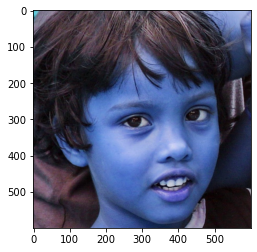

In [120]:
img = cv.imread('real_00001.jpg')
plt.imshow(img, cmap = 'gray')
plt.show()

In [165]:
import os
from skimage.feature import hog
from skimage import exposure
from skimage.transform import resize

In [166]:
realdir = 'D:/training_real'
real_path = os.listdir(realdir)

fakedir = 'D:/training_fake'
fake_path = os.listdir(fakedir)

In [170]:
def load_img(path):
    '''Loading images from directory 
    and changing color space from cv2 standard BGR to RGB 
    for better visualization'''
    
    image = cv.imread(path)
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    return image_rgb

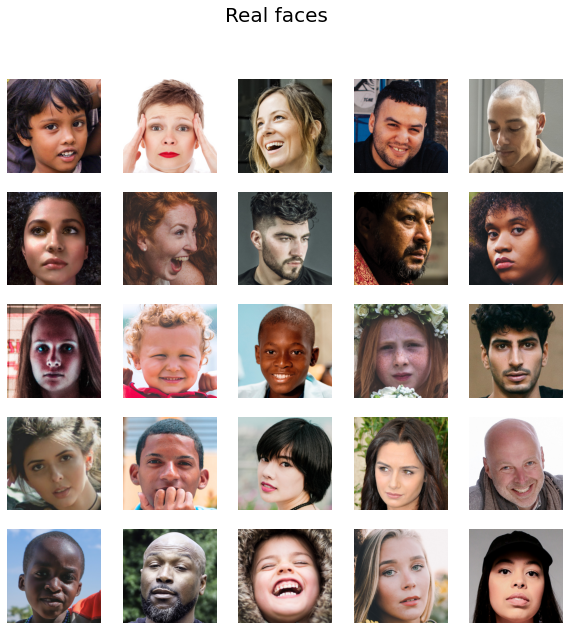

In [171]:
fig = plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(load_img(realdir+'/'+ real_path[i]))
    plt.suptitle("Real faces", fontsize=20)
    plt.axis('off')

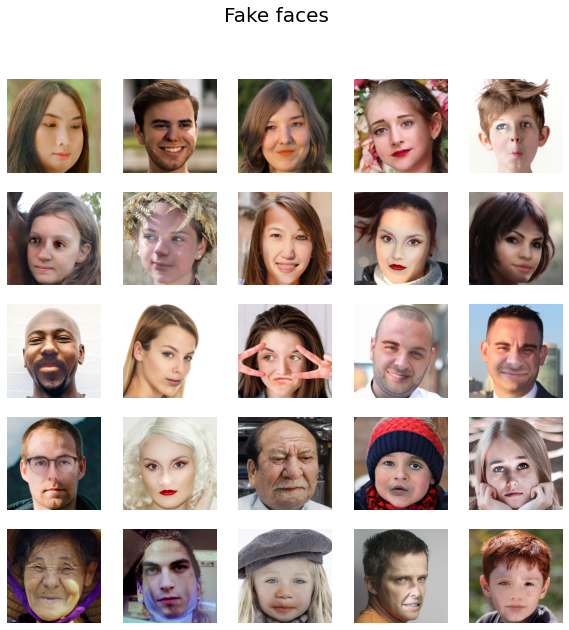

In [172]:
fig = plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(load_img(fakedir+'/'+ fake_path[i]))
    plt.suptitle("Fake faces", fontsize=20)
    plt.axis('off')

In [173]:
real_df = pd.DataFrame({'image_path': realdir+'/' + real_path[i], 'label': 1} for i in range(0, 1081))
fake_df = pd.DataFrame({'image_path': fakedir+'/' + fake_path[i], 'label': 0} for i in range(0, 960))

In [138]:
df = pd.concat([real_df, fake_df], ignore_index=True)
df.tail(10)

,image_path,label
2031,D:/training_fake/mid_91_1111.jpg,0
2032,D:/training_fake/mid_92_1111.jpg,0
2033,D:/training_fake/mid_93_1111.jpg,0
2034,D:/training_fake/mid_94_1111.jpg,0
2035,D:/training_fake/mid_95_1100.jpg,0
2036,D:/training_fake/mid_96_1111.jpg,0
2037,D:/training_fake/mid_97_1111.jpg,0
2038,D:/training_fake/mid_98_1111.jpg,0
2039,D:/training_fake/mid_99_1100.jpg,0
2040,D:/training_fake/mid_9_1110.jpg,0


In [141]:
from sklearn.utils import shuffle

df = shuffle(df)
df = df.reset_index(drop=True)
df.head(10)

,image_path,label
0,D:/training_fake/easy_92_0011.jpg,0
1,D:/training_fake/easy_1_1110.jpg,0
2,D:/training_fake/mid_354_1110.jpg,0
3,D:/training_real/real_00700.jpg,1
4,D:/training_real/real_00143.jpg,1
5,D:/training_fake/hard_230_1110.jpg,0
6,D:/training_real/real_00010.jpg,1
7,D:/training_real/real_00796.jpg,1
8,D:/training_fake/mid_342_1110.jpg,0
9,D:/training_fake/mid_127_0011.jpg,0


In [142]:
from sklearn.model_selection import train_test_split
from skimage.transform import resize

In [143]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [176]:
data_rgb = [load_img(i) for i in train_df.image_path.values]
data_grey = [cv.cvtColor(i, cv.COLOR_RGB2GRAY) for i in data_rgb]

In [224]:
train_df

,image_path,label
1848,D:/training_real/real_00370.jpg,1
1702,D:/training_real/real_00438.jpg,1
1561,D:/training_real/real_00966.jpg,1
1610,D:/training_real/real_00341.jpg,1
1691,D:/training_real/real_00720.jpg,1
...,...,...
1130,D:/training_fake/easy_55_0011.jpg,0
1294,D:/training_real/real_00530.jpg,1
860,D:/training_real/real_00149.jpg,1
1459,D:/training_fake/hard_147_1111.jpg,0


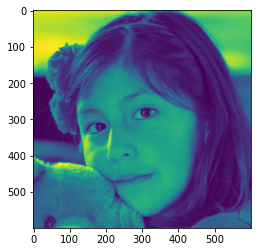

In [178]:
plt.imshow(data_grey[0])
plt.show()

In [196]:
data_r = [resize(i,(64,64)) for i in data_rgb]

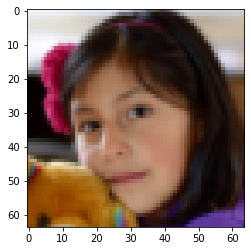

In [239]:
plt.imshow(data_r[0])
plt.show()

In [220]:
hog_features = []
hog_images = []

for image in data_r:
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), 
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)
    hog_features.append(fd)

In [227]:
from sklearn import svm

In [228]:
clf = svm.SVC()

In [230]:
clf.fit(hog_features, train_df.label.values)

SVC()

In [232]:
val_df

,image_path,label
1316,D:/training_real/real_00687.jpg,1
1000,D:/training_real/real_00538.jpg,1
1068,D:/training_real/real_00916.jpg,1
1968,D:/training_real/real_00746.jpg,1
529,D:/training_fake/mid_38_1111.jpg,0
...,...,...
471,D:/training_fake/easy_234_1000.jpg,0
1665,D:/training_real/real_00509.jpg,1
720,D:/training_fake/mid_407_1111.jpg,0
1298,D:/training_real/real_01000.jpg,1


#### Evaluating the Model

In [233]:
test_rgb = [load_img(i) for i in val_df.image_path.values]
test_r = [resize(i,(64,64)) for i in test_rgb]


In [234]:
test_hog_features = []
test_hog_images = []

for image in test_r:
    t_fd, t_hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), 
                    cells_per_block=(1, 1), visualize=True, channel_axis=-1)
    test_hog_features.append(t_fd)

In [236]:
pred = clf.predict(test_hog_features)

In [238]:
from sklearn.metrics import classification_report

print(classification_report(val_df.label.values,pred))

              precision    recall  f1-score   support

           0       0.63      0.56      0.59       192
           1       0.64      0.71      0.68       217

    accuracy                           0.64       409
   macro avg       0.64      0.63      0.63       409
weighted avg       0.64      0.64      0.64       409



## Exercise 7

In [65]:
from skimage.feature import hog
from skimage import exposure

In [ ]:
fd, hog_image = hog(x[150], orientations=8, pixels_per_cell=(2, 2), 
                    cells_per_block=(1, 1), visualize=True, multichannel=False)

C:\Users\aayus\AppData\Local\Temp\ipykernel_15732\653287845.py:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(x[150], orientations=8, pixels_per_cell=(2, 2),


In [ ]:
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

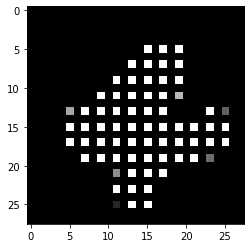

In [ ]:
plt.imshow(hog_image_rescaled, cmap='gray')
plt.show()

In [ ]:
new = hog(x[10])
hog_image_rescaled = exposure.rescale_intensity(new, in_range=(0, 10))

In [ ]:
x[10].shape

torch.Size([28, 28])

In [85]:
import tensorflow as tf
import seaborn as sns

In [86]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x = x_train
y = y_train
# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

Number of original training examples: 60000
Number of original test examples: 10000


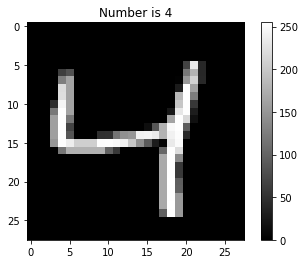

In [87]:
plt.imshow(x[2],cmap='gray')
plt.title(f'Number is {y[2]}')
plt.colorbar()
plt.show()

c:\Users\aayus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

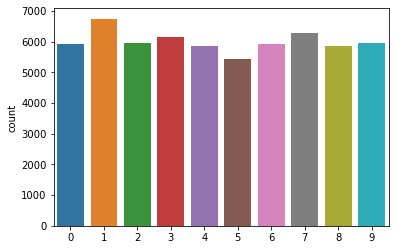

In [88]:
sns.countplot(y_train)

In [89]:
input_shape = (28, 28, 1)

x_train=x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train=x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test=x_test/255.0

In [90]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [109]:
batch_size = 64
num_classes = 10
epochs = 5

In [104]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
	# compile model
opt = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [105]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 100)               540900    
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

In [106]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.995):
      print("\nReached 99.5% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [111]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    validation_split=0.1,
                    #callbacks=[callbacks]
                    )

Epoch 1/5
938/938 [==============================] - 20s 22ms/step - loss: 0.6622 - accuracy: 0.8163 - val_loss: 0.4548 - val_accuracy: 0.8803
Epoch 2/5
938/938 [==============================] - 24s 25ms/step - loss: 0.4721 - accuracy: 0.8651 - val_loss: 0.3553 - val_accuracy: 0.9048
Epoch 3/5
938/938 [==============================] - 22s 24ms/step - loss: 0.4077 - accuracy: 0.8829 - val_loss: 0.3113 - val_accuracy: 0.9122
Epoch 4/5
938/938 [==============================] - 19s 20ms/step - loss: 0.3750 - accuracy: 0.8902 - val_loss: 0.2968 - val_accuracy: 0.9137
Epoch 5/5
938/938 [==============================] - 20s 21ms/step - loss: 0.3587 - accuracy: 0.8949 - val_loss: 0.2888 - val_accuracy: 0.9190


In [114]:
history.history

{'loss': [0.6621898412704468,
  0.4720916450023651,
  0.4076697528362274,
  0.37497827410697937,
  0.35871466994285583],
 'accuracy': [0.8163333535194397,
  0.8651000261306763,
  0.8828666806221008,
  0.8901500105857849,
  0.8949000239372253],
 'val_loss': [0.45478925108909607,
  0.35534432530403137,
  0.3113259971141815,
  0.29678982496261597,
  0.2888300120830536],
 'val_accuracy': [0.8803333044052124,
  0.9048333168029785,
  0.9121666550636292,
  0.9136666655540466,
  0.9190000295639038]}

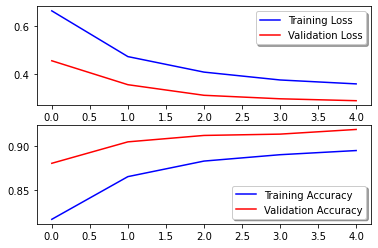

In [115]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="Validation Loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [116]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3377 - accuracy: 0.9035


In [117]:
# Predict the values from the testing dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert testing observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(Y_true, Y_pred_classes) 

313/313 [==============================] - 1s 4ms/step


<AxesSubplot:>

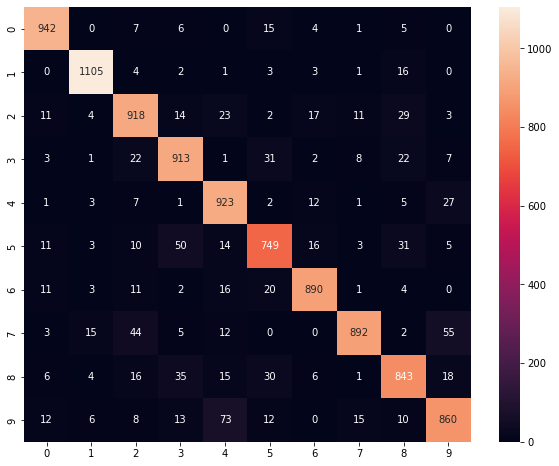

In [118]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')